Sarah Batrisyia binti Ahmad Salman  1181301724

Amiera Nur Hafidzah Binti Muzaffar	1181302678 

TC01

TT02

TDS2101(Introduction to Data Science)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('rows.csv')   
#df= pd.read_csv("rows.csv", header=None, skiprows=1, names=['LABEL','F1','F2','F3','F4','F5','X','Y','Z','C1','C2'])
# for those interested to see all columns and rows of the dataframe, uncomment the following:
#
pd.options.display.max_columns = None
pd.options.display.max_rows = None

df.shape

(141777, 10)

In [5]:
df2 = df[((df[['Year']] != 2001) & (df[['Year']] != 2002) & (df[['Year']] != 2003) & (df[['Year']] != 2004)).all(axis=1)]
df2.shape

(104961, 10)

In [4]:
df2 = df2.drop(['Unstable'], axis = 1) 

In [70]:
df2 = df2[(df2[['Count']] != 0).all(axis=1)]

In [71]:
null_rows = df2.isnull().any(axis=1)    
df2[null_rows]

,Disease,County,Year,Sex,Count,Population,Rate,CI.lower,CI.upper


In [72]:
df2.isnull().sum()

Disease       0
County        0
Year          0
Sex           0
Count         0
Population    0
Rate          0
CI.lower      0
CI.upper      0
dtype: int64

In [73]:
df2.dropna(subset=['Rate'],inplace=True)
df2.head()

,Disease,County,Year,Sex,Count,Population,Rate,CI.lower,CI.upper
12,Amebiasis,California,2005,Total,365,35987637,1.014,0.913,1.124
13,Amebiasis,California,2005,Female,103,18088355,0.569,0.465,0.691
14,Amebiasis,California,2005,Male,255,17899282,1.425,1.255,1.611
15,Amebiasis,California,2006,Total,377,36248870,1.040,0.938,1.151
16,Amebiasis,California,2006,Female,110,18220429,0.604,0.496,0.728


In [74]:
df.columns

Index(['Disease', 'County', 'Year', 'Sex', 'Count', 'Population', 'Rate',
       'CI.lower', 'CI.upper', 'Unstable'],
      dtype='object')

1(a). What is the total rate of each disease that has occur throughout 2005-2014 in California?

In [75]:
k = df2.groupby('Disease').sum()

k['Count'].sort_values()

Disease
Paralytic Shellfish Poisoning                                                          8
Plague, human                                                                         12
Rubella                                                                               16
Rabies, human                                                                         16
Cyclosporiasis                                                                        24
Botulism, Other                                                                       24
Cholera                                                                               24
Psittacosis                                                                           48
Botulism, Foodborne                                                                   84
Leptospirosis                                                                         96
Ciguatera Fish Poisoning                                                              96
Hantavirus In

1(b). What is the top 10 disease that has the highest count and  rate from 2005 - 2014?

In [76]:
dfi = df2[['Disease','Count','Rate']]
kl = dfi.groupby('Disease').sum()
kl.nlargest(10, 'Count')

,Count,Rate
Disease,,
Chlamydia,6142870,522800.689
Gonorrhea,1277928,89178.871
Campylobacteriosis,249728,30241.071
Salmonellosis,191450,20347.342
HIV,185068,10528.355
Early Syphilis,178224,9061.546
Pertussis,135262,18160.226
Coccidioidomycosis,131130,16712.651
Tuberculosis,98818,6768.564


2(a). Which county has the most disease rates because of X disease?

In [77]:
tr = df4[['County', 'Rate']]
gr= tr.groupby('County').sum()
#gr

Text(0, 0.5, 'County')

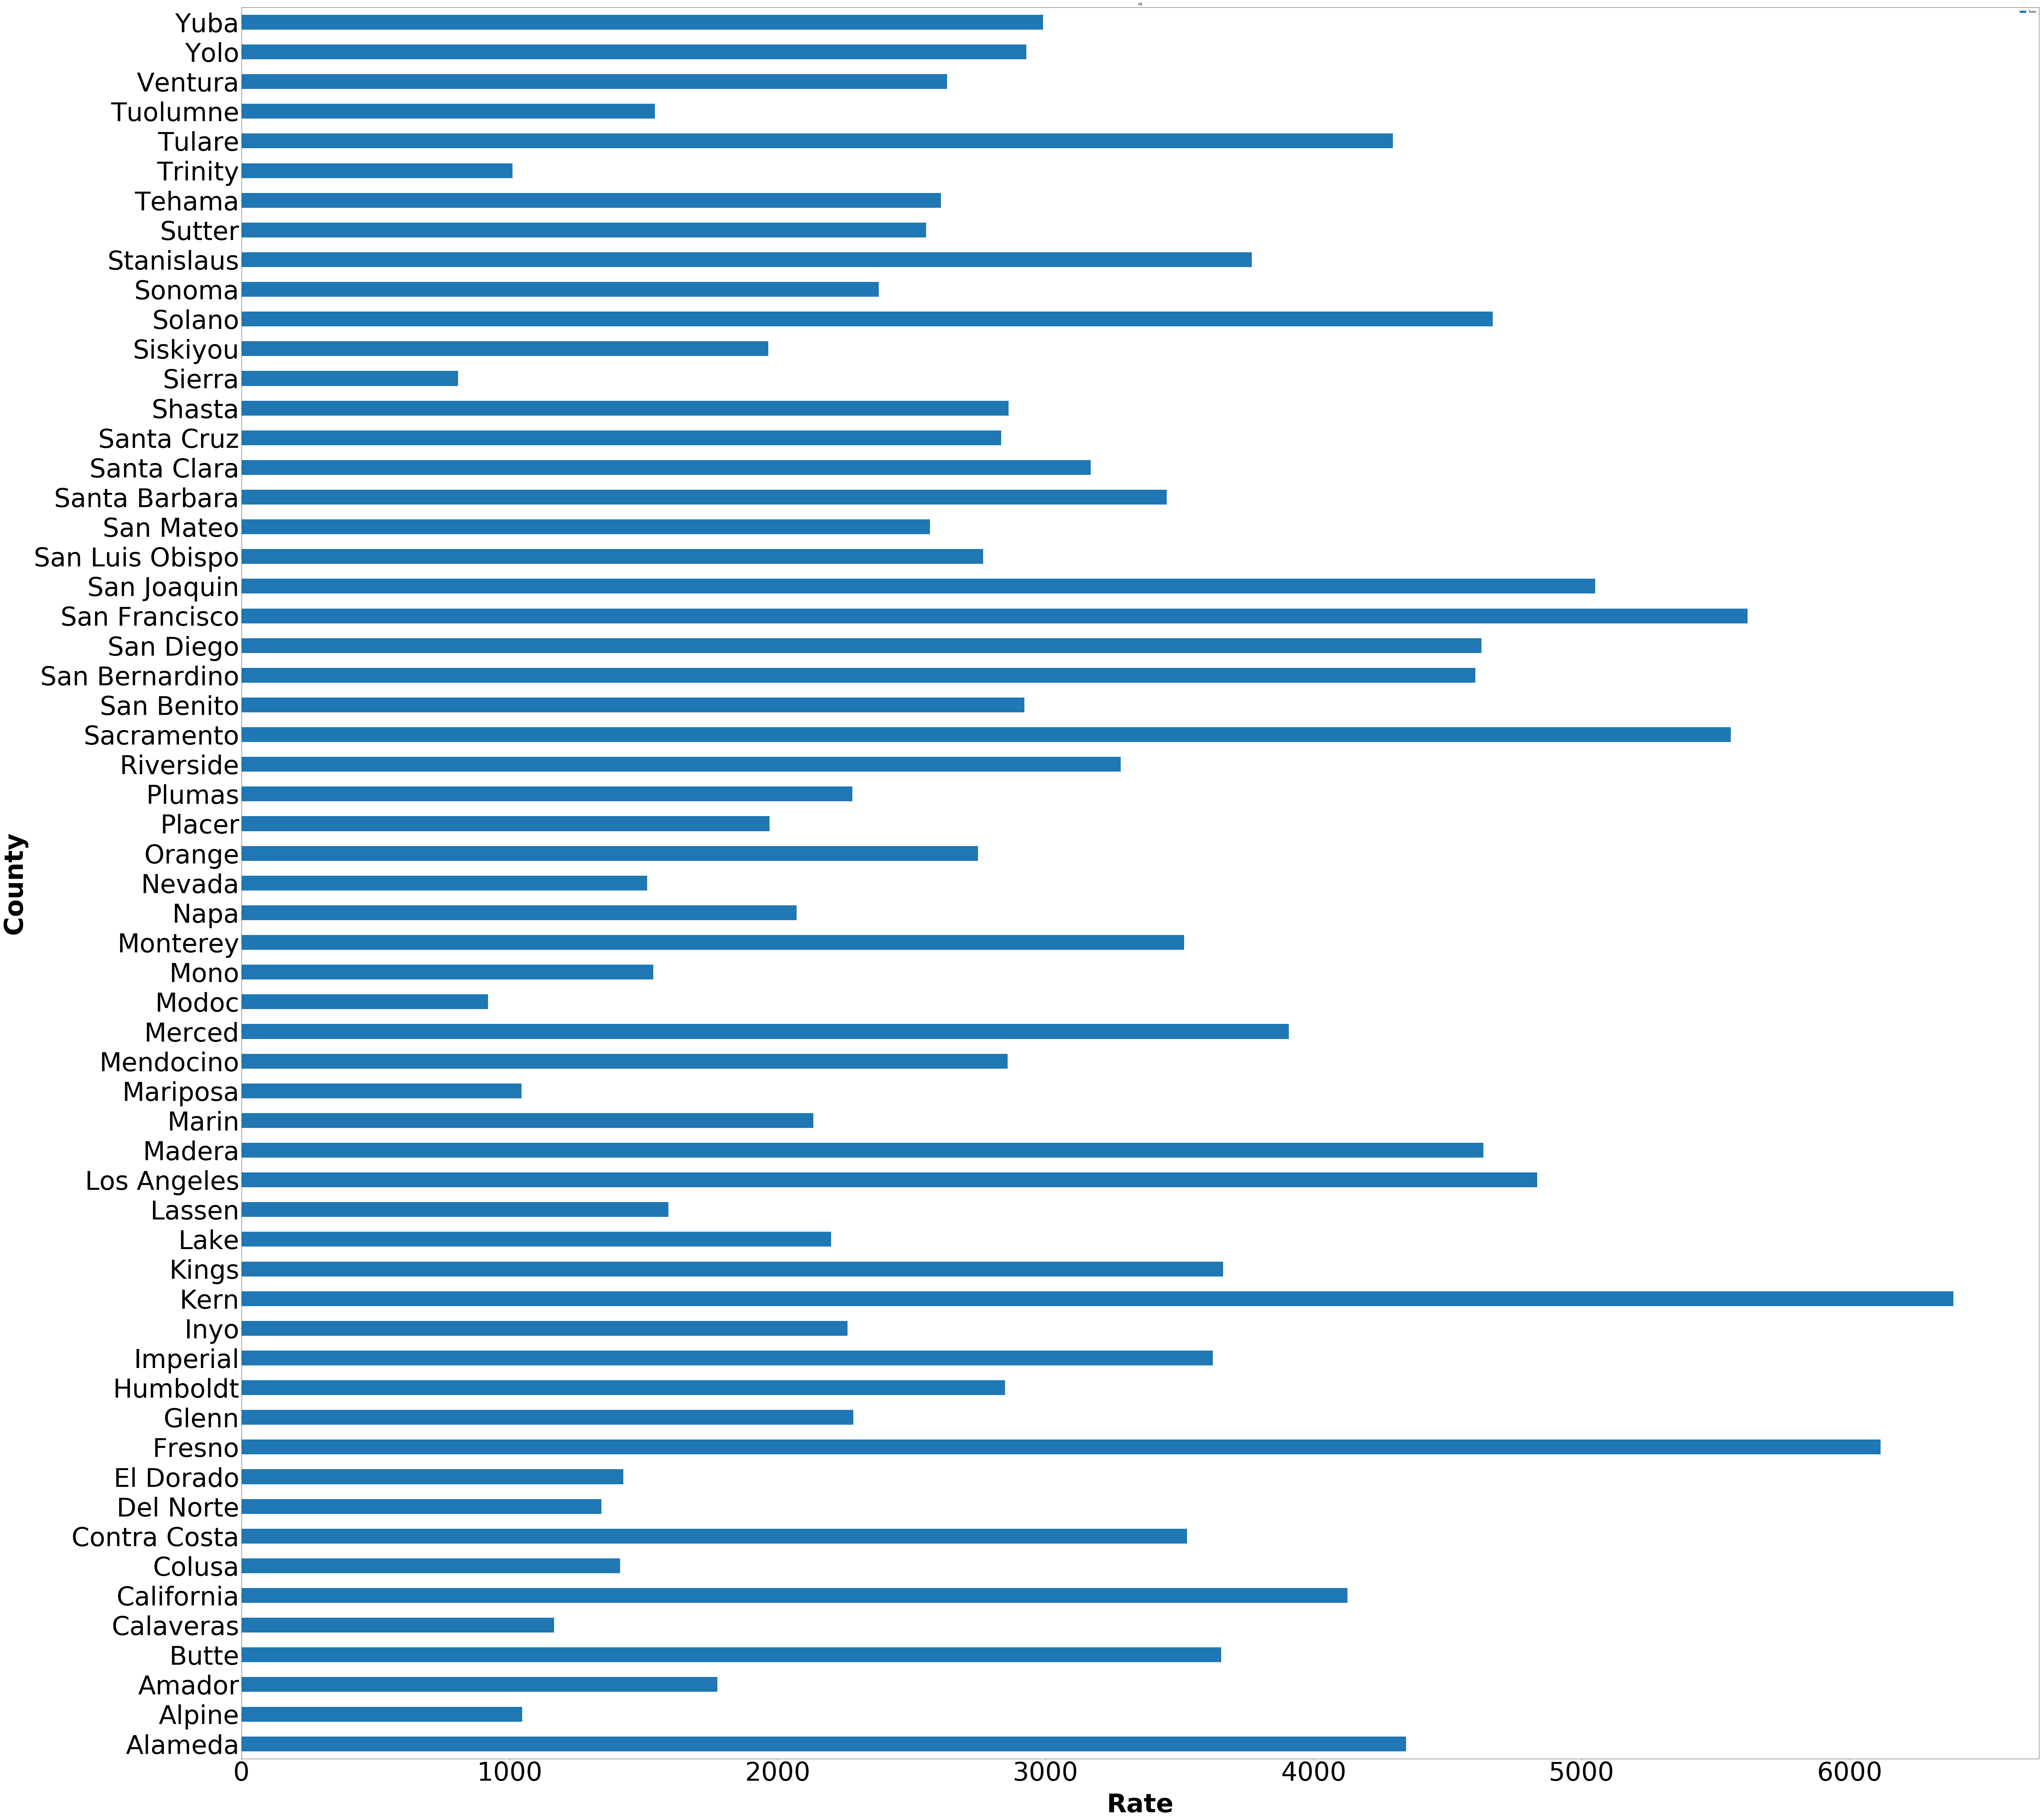

In [78]:
ax = gr.plot.barh(y='Rate',title='Hi', rot=0,fontsize= 80, figsize=(100,100))
#a("Test", labelpad=20, weight='bold', size=60)
 # Set x-axis label
ax.set_xlabel("Rate", labelpad=20, weight='bold', size=80)

  # Set y-axis label
ax.set_ylabel("County", labelpad=20, weight='bold', size=80)


    
  # Format y-axis label
#ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


2(b). What is the top 3 county with the highest rate of Chlamydia Disease?

In [79]:
fd = gr.nlargest(3,'Rate')
fd

,Rate
County,
Kern,6386.923
Fresno,6115.657
San Francisco,5619.530


2(c). Compare the top 3 county with Chlamydia throughout 2005 - 2014


In [80]:
df3 = df2.copy()
total = df2['Sex'] == "Total"
ame = df2['Disease'] == "Chlamydia"
df4 = df3[total & ame]
#df4


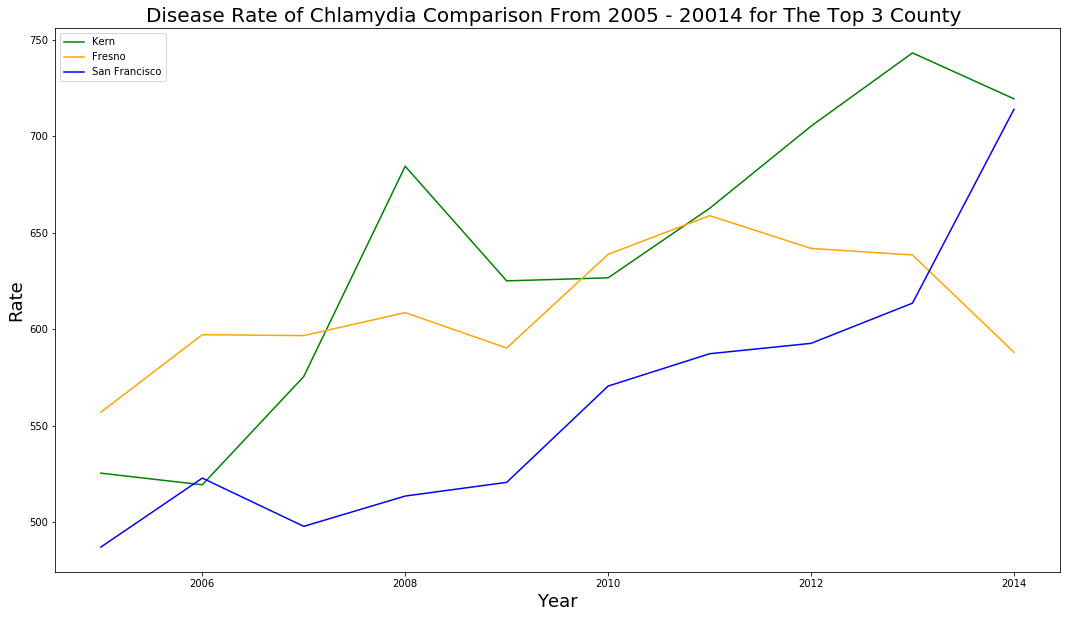

In [81]:
# set width of bar
barWidth = 0.25
f, ax = plt.subplots(figsize=(18,10))

cond = df4['County'] == "Kern"
df5 = df4.copy()
df6 = df5[cond] 
bars1 = df6['Rate']

cond1 = df4['County'] == "Fresno"
df6 = df4.copy()
df7 = df6[cond1] 
bars2 = df7['Rate']

cond2 = df4['County'] == "San Francisco"
df8 = df4.copy()
df9 = df8[cond2] 
bars3 = df9['Rate']



plt.plot(df9['Year'], bars1, color='g', label='Kern')
plt.plot(df9['Year'], bars2, color='orange', label='Fresno')
plt.plot(df9['Year'], bars3, color='blue', label='San Francisco')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Rate', fontsize=18)
plt.title('Disease Rate of Chlamydia Comparison From 2005 - 20014 for The Top 3 County ', fontsize=20)
plt.legend()
plt.show()


3. Can Chlamydia disease be decreasing in the future? (Prediction)

Text(0.5, 1.0, 'Chlamydia in California, Rate vs Year')

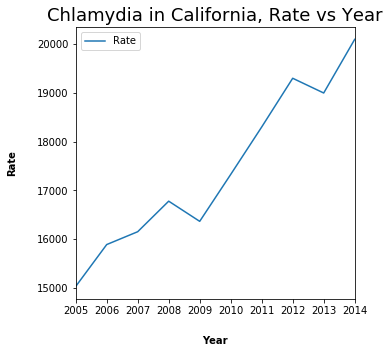

In [82]:
df5 = df4[['Year', 'Rate']]
gr1 = df5.groupby('Year').sum()

ax = gr1.plot.line(y='Rate', rot=0,fontsize= 10, figsize=(5,5))

 # Set x-axis label
ax.set_xlabel("Year", labelpad=20, weight='bold', size=10)

  # Set y-axis label
ax.set_ylabel("Rate", labelpad=20, weight='bold', size=10)
plt.title('Chlamydia in California, Rate vs Year', fontsize=18)

    

4. What is the relationship between CI.Upper and Rate for the Chlamydia disease?

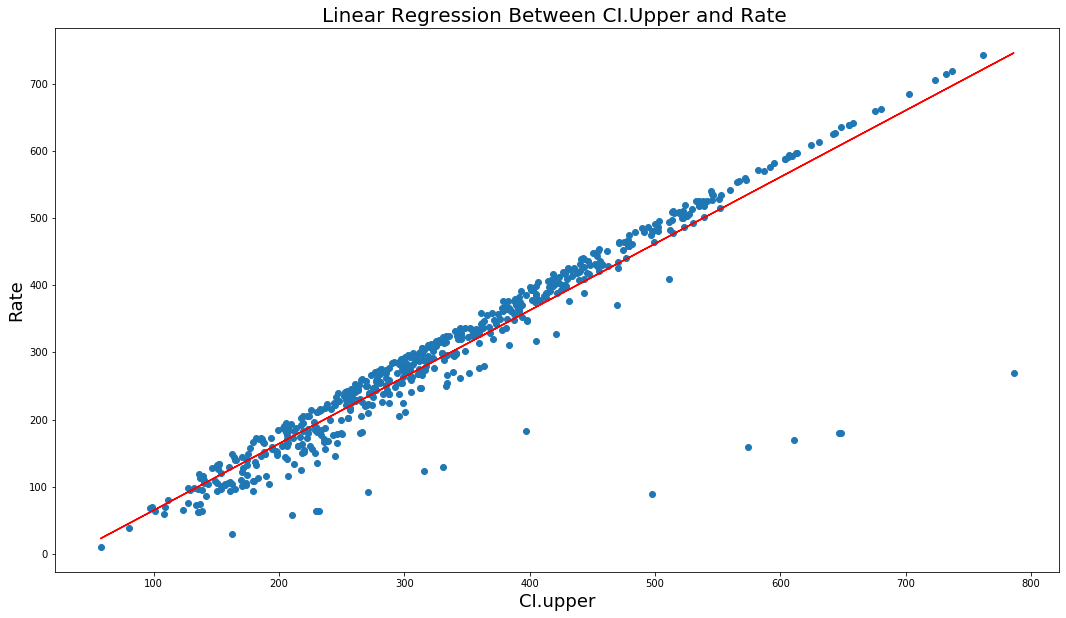

In [83]:
cdata = df4[['CI.upper','Rate']]
cdata


f, ax = plt.subplots(figsize=(18,10))

X = cdata.iloc[:, 0].values.reshape(-1,1)
Y = cdata.iloc[:, 1].values.reshape(-1,1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.xlabel('CI.upper', fontsize=18)
plt.ylabel('Rate', fontsize=18)
plt.title('Linear Regression Between CI.Upper and Rate ', fontsize=20)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

5. Compare the rate of having Chlamydia disease between male and female.

In [84]:
df6 = df2.copy()
female = df2['Sex'] == "Female"
ame = df2['Disease'] == "Chlamydia"
df7 = df6[female & ame]

f = df7[['Year', 'Rate']]
grf = f.groupby('Year').sum()

In [85]:
df8 = df2.copy()
male = df2['Sex'] == "Male"
ame = df2['Disease'] == "Chlamydia"
df9 = df6[male & ame]

m = df9[['Year', 'Rate']]
grm = m.groupby('Year').sum()


Text(0.5, 1.0, 'Female Rate for Chlamydia Disease')

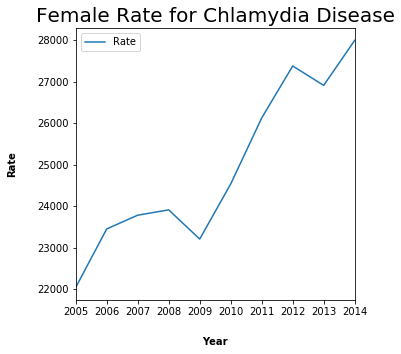

In [86]:
ax = grf.plot.line(y='Rate', rot=0,fontsize= 10, figsize=(5,5)) 

 # Set x-axis label
ax.set_xlabel("Year", labelpad=20, weight='bold', size=10)

  # Set y-axis label
ax.set_ylabel("Rate", labelpad=20, weight='bold', size=10)
plt.title('Female Rate for Chlamydia Disease', fontsize=20)


Text(0.5, 1.0, 'Male Rate for Chlamydia Disease')

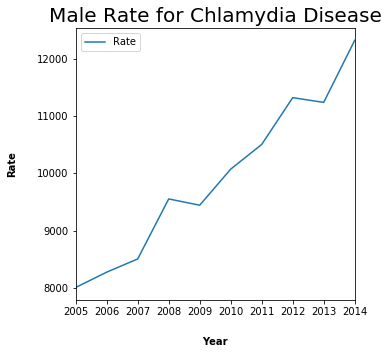

In [87]:
ay = grm.plot.line(y='Rate', rot=0,fontsize= 10, figsize=(5,5)) 

 # Set x-axis label
ay.set_xlabel("Year", labelpad=20, weight='bold', size=10)

  # Set y-axis label
ay.set_ylabel("Rate", labelpad=20, weight='bold', size=10)
plt.title('Male Rate for Chlamydia Disease', fontsize=20)
